# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Blessing Egharevba</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, accuracy_score, f1_score

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read csv
wine = pd.read_csv("winequality.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We don't have any missing value

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Exploratory Data Analysis

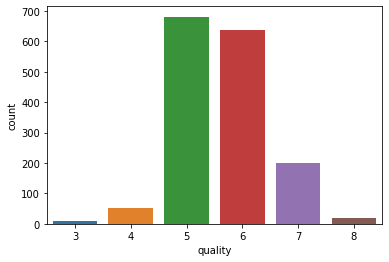

In [7]:
# Our label Distribution (countplot)
sns.countplot(wine["quality"])

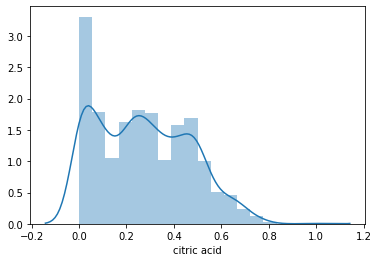

In [8]:
# Example EDA (distplot)
sns.distplot(wine["citric acid"])

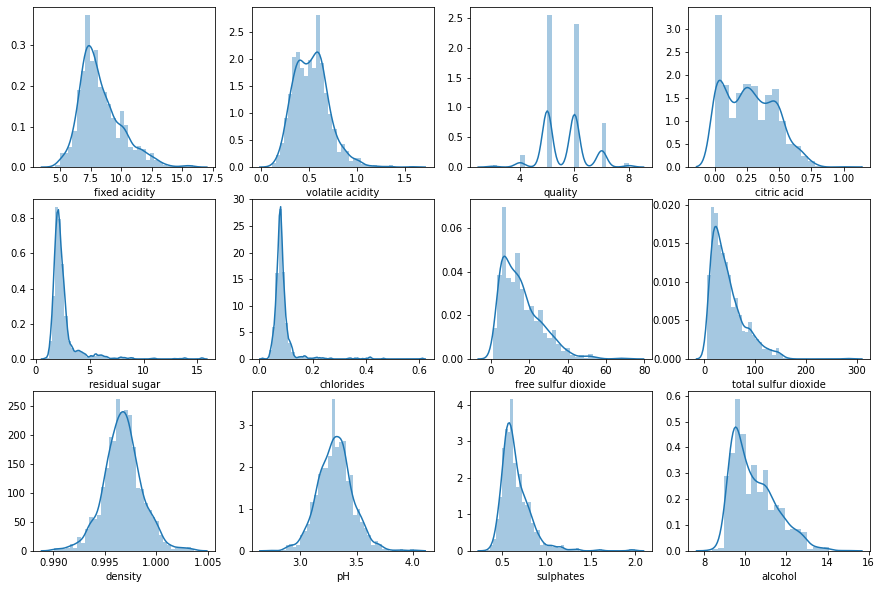

In [9]:

fig,ax = plt.subplots(3,4,figsize=(15,10))
ax1,ax2,ax3,ax4, ax5, ax6, ax7, ax8,ax9,ax10, ax11, ax12 = ax.flatten()

sns.distplot(wine['fixed acidity'],ax=ax1)
sns.distplot(wine['volatile acidity'],ax=ax2)
sns.distplot(wine['quality'],ax=ax3)
sns.distplot(wine['citric acid'],ax=ax4)
sns.distplot(wine['residual sugar'],ax=ax5)
sns.distplot(wine['chlorides'],ax=ax6)
sns.distplot(wine['free sulfur dioxide'],ax=ax7)
sns.distplot(wine['total sulfur dioxide'],ax=ax8)
sns.distplot(wine['density'],ax=ax9)
sns.distplot(wine['pH'],ax=ax10)
sns.distplot(wine['sulphates'],ax=ax11)
sns.distplot(wine['alcohol'],ax=ax12)

In [10]:
# To check for duplicate rows
dup = wine[wine.duplicated(subset = None, keep = 'first')]

In [11]:
dup.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [12]:
dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 1596
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         240 non-null    float64
 1   volatile acidity      240 non-null    float64
 2   citric acid           240 non-null    float64
 3   residual sugar        240 non-null    float64
 4   chlorides             240 non-null    float64
 5   free sulfur dioxide   240 non-null    float64
 6   total sulfur dioxide  240 non-null    float64
 7   density               240 non-null    float64
 8   pH                    240 non-null    float64
 9   sulphates             240 non-null    float64
 10  alcohol               240 non-null    float64
 11  quality               240 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 24.4 KB


In [13]:
wine = wine.drop_duplicates()

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [15]:
wine["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [16]:
wine = wine.reset_index().drop("index",1)

In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [18]:
X = wine.drop("quality", 1)
y = wine["quality"]

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [20]:
# To deal with the imbalanced data

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_sample(X ,y)

print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({5: 577, 6: 577, 7: 577, 4: 577, 8: 577, 3: 577})


In [21]:
data = X[["fixed acidity", "residual sugar", "free sulfur dioxide", "total sulfur dioxide","pH", "alcohol" ]]
data1 = X.drop(data, 1)


scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X = pd.concat([scaled_features, data1], 1)
X.head()



,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,alcohol,volatile acidity,citric acid,chlorides,density,sulphates
0,0.247788,0.068493,0.140845,0.098940,0.606299,0.153846,0.70,0.00,0.076,0.9978,0.56
1,0.283186,0.116438,0.338028,0.215548,0.362205,0.215385,0.88,0.00,0.098,0.9968,0.68
2,0.283186,0.095890,0.197183,0.169611,0.409449,0.215385,0.76,0.04,0.092,0.9970,0.65
3,0.584071,0.068493,0.225352,0.190813,0.330709,0.215385,0.28,0.56,0.075,0.9980,0.58
4,0.247788,0.061644,0.169014,0.120141,0.606299,0.153846,0.66,0.00,0.075,0.9978,0.56


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

### DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)

print("Accuracy of train:",tree.score(X_train,y_train))
print("Accuracy of test:",tree.score(X_test,y_test))

Accuracy of train: 0.9096161782913743
Accuracy of test: 0.7276227141482194


In [24]:
print(classification_report(y_test, tree_predict))
print(confusion_matrix(y_test, tree_predict))

              precision    recall  f1-score   support

           3       0.95      0.97      0.96       173
           4       0.78      0.84      0.81       173
           5       0.59      0.54      0.57       173
           6       0.45      0.40      0.42       174
           7       0.69      0.69      0.69       173
           8       0.84      0.93      0.88       173

    accuracy                           0.73      1039
   macro avg       0.72      0.73      0.72      1039
weighted avg       0.72      0.73      0.72      1039

[[167   1   3   1   1   0]
 [  4 145  11  10   3   0]
 [  1  24  94  48   6   0]
 [  4  15  44  69  34   8]
 [  0   0   7  23 120  23]
 [  0   0   0   2  10 161]]


In [25]:
print("Precision = {}".format(precision_score(y_test, tree_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, tree_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, tree_predict)))
print("F1 Score = {}".format(f1_score(y_test, tree_predict,average='macro')))

Precision = 0.717169936656367
Recall = 0.7279416650056475
Accuracy = 0.7276227141482194
F1 Score = 0.7215322940353238


### Tuning the DecisionTreeClassifier

In [27]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
          "criterion": ['gini', 'entropy'],
         "max_depth" : [2,4,6,8,10,12]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 3528 candidates, totalling 10584 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10584 out of 10584 | elapsed:  3.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [28]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=99, random_state=42)

In [29]:
tree1 = DecisionTreeClassifier(max_depth=12, max_leaf_nodes=99, criterion = "gini", random_state=42)
tree1.fit(X_train, y_train)
tree1_predict = tree.predict(X_test)

print("Accuracy of train:",tree1.score(X_train,y_train))
print("Accuracy of test:",tree1.score(X_test,y_test))

Accuracy of train: 0.8196450680973999
Accuracy of test: 0.7208854667949952


Tuning the parameters didnt improve our model

In [30]:
print(classification_report(y_test, tree1_predict))
print(confusion_matrix(y_test, tree1_predict))

              precision    recall  f1-score   support

           3       0.95      0.97      0.96       173
           4       0.78      0.84      0.81       173
           5       0.59      0.54      0.57       173
           6       0.45      0.40      0.42       174
           7       0.69      0.69      0.69       173
           8       0.84      0.93      0.88       173

    accuracy                           0.73      1039
   macro avg       0.72      0.73      0.72      1039
weighted avg       0.72      0.73      0.72      1039

[[167   1   3   1   1   0]
 [  4 145  11  10   3   0]
 [  1  24  94  48   6   0]
 [  4  15  44  69  34   8]
 [  0   0   7  23 120  23]
 [  0   0   0   2  10 161]]


### XGBOOSTClassifier

In [31]:
# importing xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


print("Accuracy of train:",xgb.score(X_train,y_train))
print("Accuracy of test:",xgb.score(X_test,y_test))


Accuracy of train: 1.0
Accuracy of test: 0.8344562078922041


In [32]:
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

              precision    recall  f1-score   support

           3       0.98      0.99      0.99       173
           4       0.94      0.94      0.94       173
           5       0.72      0.70      0.71       173
           6       0.63      0.56      0.59       174
           7       0.80      0.84      0.82       173
           8       0.90      0.98      0.94       173

    accuracy                           0.83      1039
   macro avg       0.83      0.83      0.83      1039
weighted avg       0.83      0.83      0.83      1039

[[172   0   1   0   0   0]
 [  1 163   3   5   1   0]
 [  1   8 121  39   4   0]
 [  1   2  40  97  27   7]
 [  1   0   3  13 145  11]
 [  0   0   0   0   4 169]]


### Hyperparameter Tuning for XGboost

In [33]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [190,200,210,500,1000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

[23:19:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Tuned: {'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 500}
Mean of the cv scores is 0.794878
Train Score 1.000000
Test Score 0.845043
Seconds used for refitting the best model on the train dataset: 8.009747


In [34]:
xgb1 = XGBClassifier(random_state=1, learning_rate =  0.1, max_depth = 7, min_child_weight = 1, n_estimators = 210)
xgb1.fit(X_train, y_train)
xgb1_pred = xgb.predict(X_test)


print(classification_report(y_test, xgb1_pred))
print(confusion_matrix(y_test, xgb1_pred))

              precision    recall  f1-score   support

           3       0.98      0.99      0.99       173
           4       0.94      0.94      0.94       173
           5       0.72      0.70      0.71       173
           6       0.63      0.56      0.59       174
           7       0.80      0.84      0.82       173
           8       0.90      0.98      0.94       173

    accuracy                           0.83      1039
   macro avg       0.83      0.83      0.83      1039
weighted avg       0.83      0.83      0.83      1039

[[172   0   1   0   0   0]
 [  1 163   3   5   1   0]
 [  1   8 121  39   4   0]
 [  1   2  40  97  27   7]
 [  1   0   3  13 145  11]
 [  0   0   0   0   4 169]]


### RandomForestClassifier

In [35]:
#importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)



print("Accuracy of train:",rf.score(X_train,y_train))
print("Accuracy of test:",rf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.8315688161693936


In [36]:
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           3       0.97      1.00      0.99       173
           4       0.90      0.95      0.92       173
           5       0.70      0.69      0.69       173
           6       0.64      0.49      0.56       174
           7       0.79      0.87      0.83       173
           8       0.93      0.99      0.96       173

    accuracy                           0.83      1039
   macro avg       0.82      0.83      0.82      1039
weighted avg       0.82      0.83      0.82      1039

[[173   0   0   0   0   0]
 [  0 164   6   2   1   0]
 [  1  12 119  36   5   0]
 [  3   4  44  86  33   4]
 [  1   2   1  10 150   9]
 [  0   0   0   0   1 172]]


### Tuning the parameters of RandomForest

In [37]:
# Tuning the parameters of RandomForest
# Using RandomizedSearch


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.5min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [39]:
# Using the new value for alpha
rf_hype=RandomForestClassifier( n_estimators = 1000,
    max_depth=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=False,
 )

rf_hype.fit(X_train, y_train)
rf1_pred=rf_hype.predict(X_test)

print(classification_report(y_test, rf1_pred))
print(confusion_matrix(y_test, rf1_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       173
           4       0.93      0.95      0.94       173
           5       0.70      0.70      0.70       173
           6       0.63      0.51      0.56       174
           7       0.80      0.88      0.84       173
           8       0.94      0.98      0.96       173

    accuracy                           0.84      1039
   macro avg       0.83      0.84      0.83      1039
weighted avg       0.83      0.84      0.83      1039

[[173   0   0   0   0   0]
 [  0 165   5   2   1   0]
 [  0  10 121  38   4   0]
 [  1   3  47  88  31   4]
 [  1   0   1  12 152   7]
 [  0   0   0   0   3 170]]


Tuning the parameters improved our model a little bit

### Catboost Classifier

In [40]:
from catboost import CatBoostClassifier
cat1 = CatBoostClassifier(depth = 6, iterations = 1000, learning_rate = 0.1, random_state=1,
                               verbose = 100)
cat1.fit(X_train, y_train)
cat1_pred = cat1.predict(X_test)

print("Accuracy of train:",cat1.score(X_train,y_train))
print("Accuracy of test:",cat1.score(X_test,y_test))

0:	learn: 1.6733210	total: 116ms	remaining: 1m 55s
100:	learn: 0.5082894	total: 2.23s	remaining: 19.9s
200:	learn: 0.3466491	total: 4.28s	remaining: 17s
300:	learn: 0.2576101	total: 6.31s	remaining: 14.6s
400:	learn: 0.2006341	total: 8.36s	remaining: 12.5s
500:	learn: 0.1610666	total: 10.8s	remaining: 10.8s
600:	learn: 0.1313376	total: 13.3s	remaining: 8.82s
700:	learn: 0.1090728	total: 15.4s	remaining: 6.55s
800:	learn: 0.0919505	total: 17.4s	remaining: 4.32s
900:	learn: 0.0791349	total: 19.5s	remaining: 2.14s
999:	learn: 0.0689408	total: 21.5s	remaining: 0us
Accuracy of train: 0.9995872884853487
Accuracy of test: 0.8315688161693936


In [41]:
print(classification_report(y_test, cat1_pred))
print(confusion_matrix(y_test, cat1_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       173
           4       0.89      0.97      0.93       173
           5       0.71      0.62      0.66       173
           6       0.61      0.54      0.57       174
           7       0.80      0.86      0.83       173
           8       0.94      1.00      0.97       173

    accuracy                           0.83      1039
   macro avg       0.82      0.83      0.83      1039
weighted avg       0.82      0.83      0.83      1039

[[173   0   0   0   0   0]
 [  1 168   2   0   2   0]
 [  0  15 108  44   6   0]
 [  0   5  41  94  29   5]
 [  1   0   2  15 148   7]
 [  0   0   0   0   0 173]]


### The tuned RandomForestClassifier gave us the best score
### The best metrics to use is the F1-score
### We can as well use the Acuracy_score since the issue of imbalanced Dataset has been dealt with